In [63]:
import pandas as pd

data = pd.read_csv('diabetes.csv')


In [64]:
print(data.isnull().sum())

age                  0
sex                  0
bmi                  0
bp                   0
tc                   0
ldl                  0
hdl                  0
tch                  0
ltg                  0
glu                  0
response_interest    0
dtype: int64


In [65]:
from sklearn.neighbors import KNeighborsRegressor
y = data.pop('response_interest')

print(y.shape)

(442,)


In [70]:
x = data.copy()
x = x.loc[:,'bmi'].values
x = x.reshape(-1,1)

knn_reg_model = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
knn_reg_model.fit(x,y)


KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [67]:
y_pred = knn_reg_model.predict(x)
print("Actual response interest is {:.2f}".format(y[0]))
print("Estimated response interest is {:.2f}".format(y_pred[0]))

Actual response interest is 151.00
Estimated response interest is 167.67


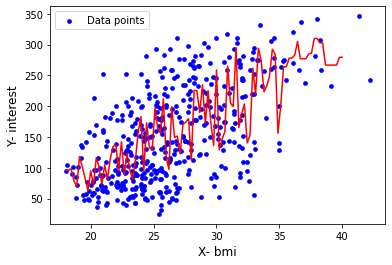

In [76]:
import numpy as np
fig,ax=plt.subplots()
ax.scatter(x,y, label="Data points", color='blue',marker='.',linewidth=1.75)
ax.set_xlabel("X- bmi",fontsize=12)
ax.set_ylabel("Y- interest", fontsize=12)

x_test=np.linspace(18,40,100).reshape(-1,1)
y_pred_test = knn_reg_model.predict(x_test)
plt.plot(x_test,y_pred_test,color='red')
ax.legend()
plt.show()



In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse= mean_squared_error(y,y_pred)
mae=mean_absolute_error(y,y_pred)
r2=r2_score(y,y_pred)
print("Training set MSE= {:.2f}".format(mse))
print("Training set MAE= {:.2f}".format(mae))
print("Training set R-sqaured= {:.2f}".format(r2))

Training set MSE= 3067.27
Training set MAE= 44.76
Training set R-sqaured= 0.48
